
# Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

Data Set Overview:
I have selected TMDb Movie Data set to complete my data analysis project. The TMDb Movie  data set contains data for 10,000 movies from the movie database(TMDb), inluding user ratings and revenue.

 Questions that can be asked as part of investigating this data set:

 1. Movies with had most and least profit
 2. Movies with more and less budgets
 3. Movies longest and shorest runtime
 4. Average run time of the movies
 5. Most profitable year analysis with respect to the year
 6. Movie run time analysis
 7. Successful genres with respect to profitable movies
 8. Average budget with respect to the profitable movies
 9. Average revenue analysis with respect to the profitable movies
 10. Average duration analysis with respect to the profitable movies
 11. Most repeated actor/cast with respect to the profitable movies


In [1]:
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> As part of the data wrangling after observing the dataset and framing the questions to be analyzed, we will only retain the data needed and delete the unused data so that it will be easier for us to make calculations.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# loading the data and storing it in tmdb_data
tmdb_data = pd.read_csv('tmdb-movies.csv')

#printing the first five rows of the dataset
tmdb_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Data Cleaning (Cleaning the unused information from the dataset)

Observations as part of the data cleaning process:

1. Need to remove unused columns such as id, imdb_id, vote_count, homepage, production_company etc.
2. Removing duplicate rows.
3. Some movies in the dataset have zero budget or zero revenue, so eliminating such records from the dataset.
4. Formating release date column into date format.
5. Replacing zero with Naan during runtime.
6. Formating the budget and revenue columns.

1. Unused columns that need to be removed: id, imdb_id, popularity, budget_adj, revenue_adj, homepage, keywords, overview, production_companies, vote_count and vote_average

In [3]:
# List of columns to be deleted
del_col = ['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage','keywords', 
           'overview', 'production_companies','vote_count', 'vote_average']
# deleting the columns 
tmdb_data = tmdb_data.drop(del_col, 1)

# verifying the new dataset after deleting the columns
tmdb_data.head()


,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


### 2. Removing duplicate rows

In [4]:
# Checking for the number of records in the dataset
rows, col = tmdb_data.shape

#Reducing the count of the row by one as it contains header row.
print('There are {} total records of movies and {} number of columns in the dataset. '.format(rows-1, col))


There are 10865 total records of movies and 10 number of columns in the dataset. 


In [5]:
#Removing the duplicates
tmdb_data.drop_duplicates(keep = 'first', inplace = True)
rows, col = tmdb_data.shape

#Checking for the number of entries after removing the duplicates
print('There are now {} total records of movies and {} number of columns in the dataset. '.format(rows-1, col))

There are now 10864 total records of movies and 10 number of columns in the dataset. 


In [ ]:
There was one duplicate record of movie thats been removed.

### 3. Removing 0's from the revenue and budget columns 

In [6]:
# Creating list of budget and revenue columns
br_list = ['budget', 'revenue']

#Replacing the 0's with NAN in the list
tmdb_data[br_list] = tmdb_data[br_list].replace(0, np.NAN)

#Removing the rows with NAN in the br_list
tmdb_data.dropna(subset = br_list, inplace = True)

rows, col = tmdb_data.shape
print('Number of entries in the datset after removing 0s from the revenue and budget are {}.' .format(rows-1))


Number of entries in the datset after removing 0s from the revenue and budget are 3853.


### 4. Formating the release date column 

In [7]:
tmdb_data.release_date = pd.to_datetime(tmdb_data['release_date'])

In [8]:
# Verfying the date format change in the dataset
tmdb_data.head(2)

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


### 5. Replacing the zero with NAN in runtime column

In [9]:
# Replacing the zero with NAN in runtime column 
tmdb_data['runtime'] = tmdb_data['runtime'].replace(0, np.NAN)

### 6. Formating the revenue and budget columns

In [10]:
#Checking the data types of the dataset
tmdb_data.dtypes

budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [11]:
changedata_type = ['budget', 'revenue']

#Changing the datatypes of budget and revenue
tmdb_data[changedata_type] = tmdb_data[changedata_type].applymap(np.int64)

# Verifying the changed data type format for Revenue and budget columns
tmdb_data.dtypes

budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                    int64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Movies had the most and least profit

In [12]:
# Calculating the profit of each movie by passing three parameters from the dataset to the insert
# function (index of the column, name of the column, value to be inserted)
tmdb_data.insert(2, 'profit_earned', tmdb_data['revenue'] - tmdb_data['budget'])

# Previewing the dataset changes
tmdb_data.head(3)

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015


In [21]:
import pprint
# defining a function to calculate the profit
def calculate(column):
    # Highest profit earned movies
    high = tmdb_data[column].idxmax()
    high_details = pd.DataFrame(tmdb_data.loc[high])
    
    # Lowest Profit earned movies
    low = tmdb_data[column].idxmin()
    low_details = pd.DataFrame(tmdb_data.loc[low])
    
    # Merging both profits data
    info = pd.concat([high_details, low_details], axis=1)
    return info

# Calling the calculate function
calculate('profit_earned')

,1386,2244
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00


### Observations based on low and higest profit earned movies:
1. Based on the above calculations we can summarise that 'Avatar' movie earned the higest profit of '2544505847'.
2. 'The Worrior's Way' movie earned the lowest profit of '-413912431'.

### Research Question 2:  Movies with high and low budgets

In [14]:
# Reusing the calculate function to calculate the low and hight budgets
calculate('budget')

,2244,2618
budget,425000000,1
revenue,11087569,100
profit_earned,-413912431,99
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00


### Observations: 
Based on the above budget calculations we can summarise that the 'The Warriors Way' was the highest budget movie
of 425,000,000 dollars and the 'Lost & Found' was the lowest budget movie of dollar one.

### Research Question 3:  Movies with most and least revenues

In [15]:
# Reusing the calculate functions for Revenue calculations
calculate('revenue')

,1386,5067
budget,237000000,6000000
revenue,2781505847,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00


### Observations: 
Based on the above revenue calculations we can summarise that the 'Avatar' movie generated the highest revenue of 2,781,505,847
dollars and the 'Shatter Glass' movie generated the lowest revenue of 2 dollars.

# Research Question 4: Analysis of the movies with shortest and longest runtime

In [16]:
# Reusing the calcualte function to analyze the shortest and longest runtimes
calculate('runtime')

,2107,5162
budget,18000000,10
revenue,871279,5
profit_earned,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
release_date,2010-05-19 00:00:00,2003-06-02 00:00:00


### Observations: 
Based on the above movie runtime calculations we can summarise that the 'Carlos' movie had the highest runtime of 
338 minutes and the 'Kids Story' movie with the lowest runtime of 15 minutes.

# Research Question 5: Average runtime  of the movies

In [17]:
# Defining function to calculate the average 
def avg_fun(column):
    return tmdb_data[column].mean()

In [18]:
# Calling the avg_fun 
avg_fun('runtime')

109.22029060716139

### Observations:  
Based on the above average runtime calculations, the average runtime of a movie is 109 minutes. Lets analyse the same runtime in a graphical approach. 

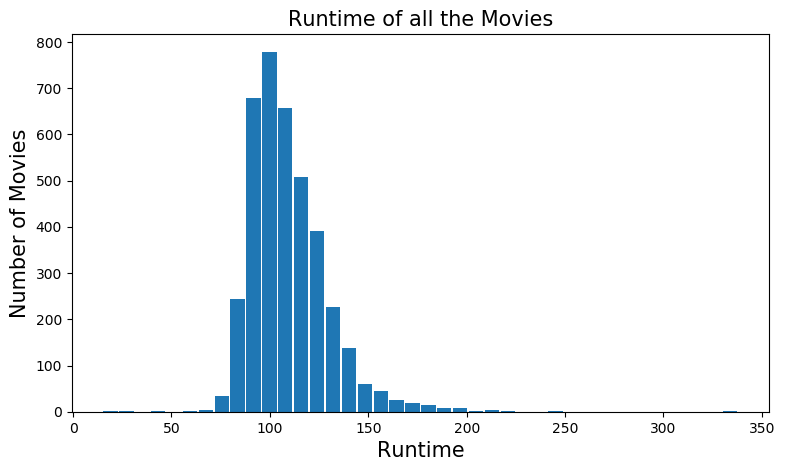

In [19]:
#  Plotting histogram of movies runtime

# Defining the figure size
plt.figure(figsize = (9,5), dpi =100)

# x-axis
plt.xlabel('Runtime', fontsize  = 15)
# y-axis
plt.ylabel('Number of Movies', fontsize = 15)
# Title of the Histogram
plt.title('Runtime of all the Movies', fontsize = 15)

# Plotting Histogram
plt.hist(tmdb_data['runtime'], rwidth = 0.9, bins = 40)
plt.show()


In [ ]:
The distribution of the runtime of all the movies graph skewed towards right. Most number of the movies runtime is 
bewteen 80 and 120 minutes. More than 1000 movies fall in this runtime frame.
We can further analyse the runtime of the movies with different plot types such as Box Plot  and Data Point plot.

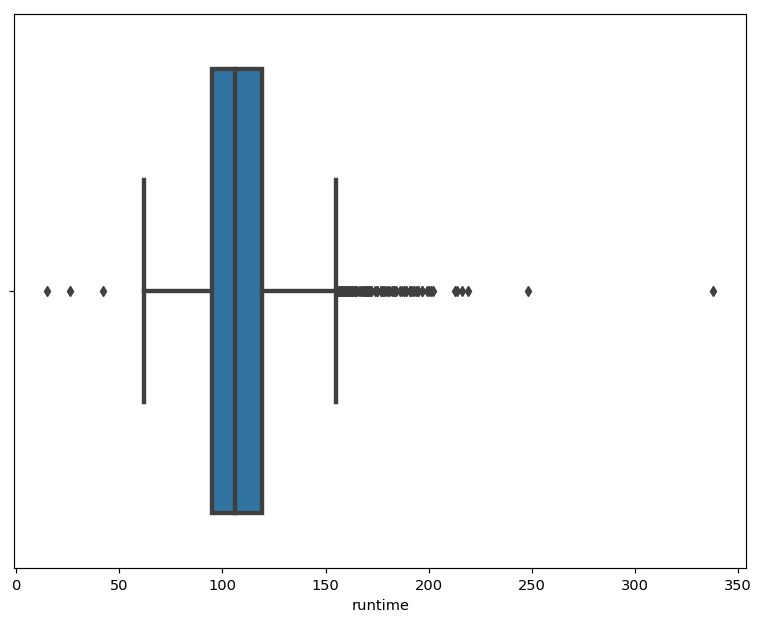

In [23]:
import seaborn as sns
# Generating the box plot
plt.figure(figsize = (9,7), dpi = 105)
sns.boxplot(tmdb_data['runtime'], linewidth = 3)

# Showing the plot
plt.show()

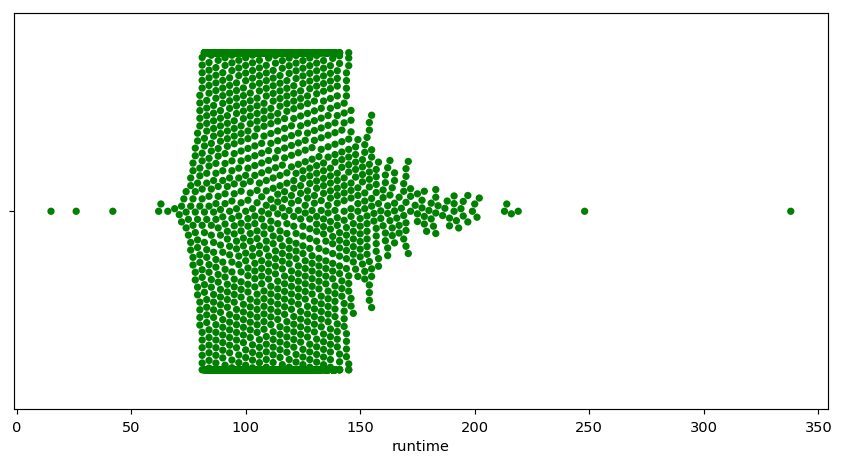

In [20]:
# Generating the data plot of runtime of the movie
plt.figure(figsize = (10,5), dpi = 105)
sns.swarmplot(tmdb_data['runtime'], color = 'green')
plt.show()

In [25]:
# Getting runtime of the movies
tmdb_data['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

In [ ]:
The above box plot shows how the runtime of the movie distribution is spread. By observing box plot, data point plot 
and runtime of the movie calculations we can make below conclusions:

    1. 25% of the movies have a runtime of less than 95 minutes.
    2. 50% of the movies have a runtime of less than 109 minutes.
    3. 75% of the movies have a runtime of less than 119 minutes.       

# Research Question 6: Most profitable year analysis with respect to the year

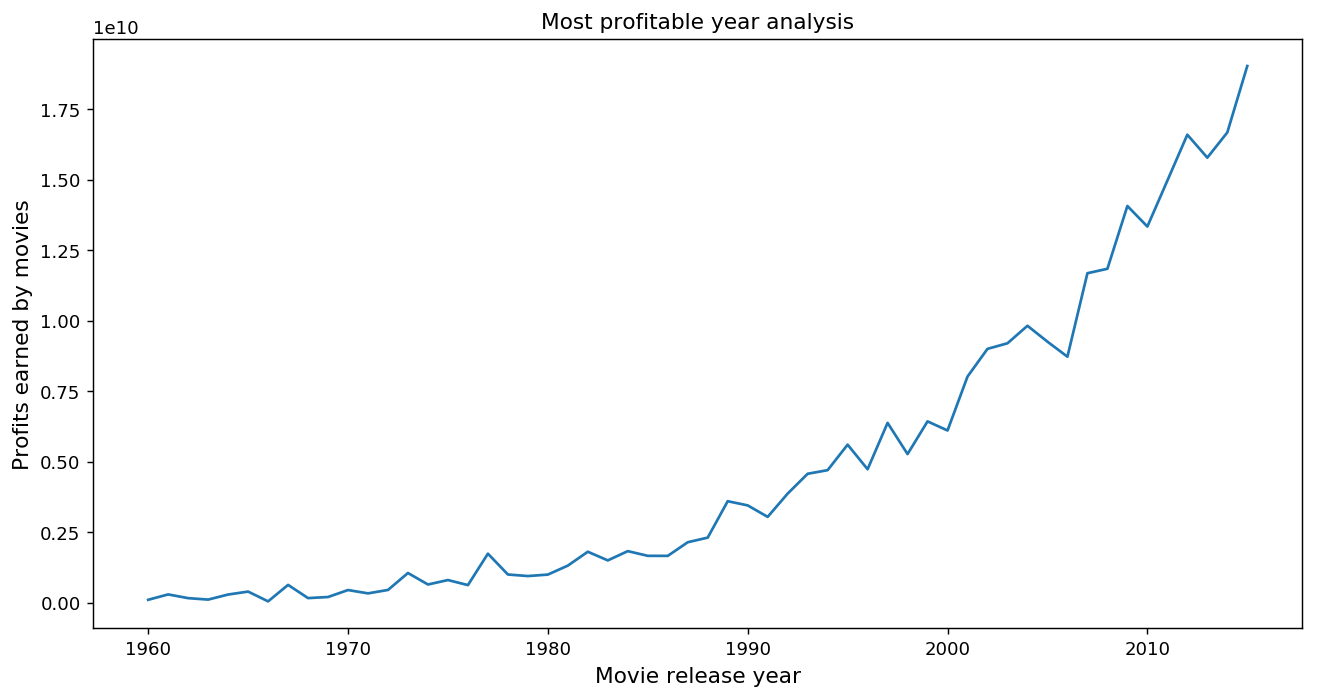

In [32]:
# Summing up all the movies of a particular year to get the profits of the movies for every year.
ttlprofits_year = tmdb_data.groupby('release_year')['profit_earned'].sum()

# Defining figure size 
plt.figure(figsize=(12,6), dpi = 130)

# X-axis
plt.xlabel('Movie release year', fontsize = 12)

# Y-axis
plt.ylabel('Profits earned by movies',  fontsize = 12)

# Plot title
plt.title('Most profitable year analysis')

# Plotting the graph
plt.plot(ttlprofits_year)
plt.show()

In [33]:
# Finding which year made most profit
ttlprofits_year.idxmax()

2015

In [ ]:
After observing both the 'Most profitable year analysis' graph and maximum profit made year calculations,it is obvious
that the 2015 was the most profitable year. 

In [ ]:
For further analysis on movies, considered only those movies that earned a significant amount i.e, 
more than 50 million dollars of profit. 

In [23]:
# Filtering movies with more than $50M profit.
profit_data = tmdb_data[tmdb_data['profit_earned'] >= 50000000]

# Reindexing new data
profit_data.index = range(len(profit_data))

# Starting the index from 1 instead of 0
profit_data.index = profit_data.index + 1

# Printing the dataset
profit_data.head()

,budget,revenue,profit_earned,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
4,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [24]:
# Counting the number of rows
len(profit_data)

1338

In [ ]:
After filtering the data (>$50M profit) the number of rows in the dataset reduced to
1338 from 3853.

# Research Question7 : Successful Genres

In [26]:
# Writing a function that takes a column as an argument and keep its track
def data (column):
    # Separating the stringby '|'
    data = profit_data[column].str.cat(sep = '|')
    
    # Storing the values separately by using pandas series
    data = pd.Series(data.split('|'))
    
    # Arranging values in descending oredr
    count = data.value_counts(ascending = False)
    
    return count
    

In [27]:
# Storing the returned value
count = data('genres')

# Printing top values
count.head()

Comedy       492
Drama        481
Action       464
Thriller     405
Adventure    379
dtype: int64

In [ ]:
From the above calculations we can conclude that the Comdey, Drama, Action, Triller and Adventure 
are the top most successful Genres. Lets do the graphical analysis on the same data.

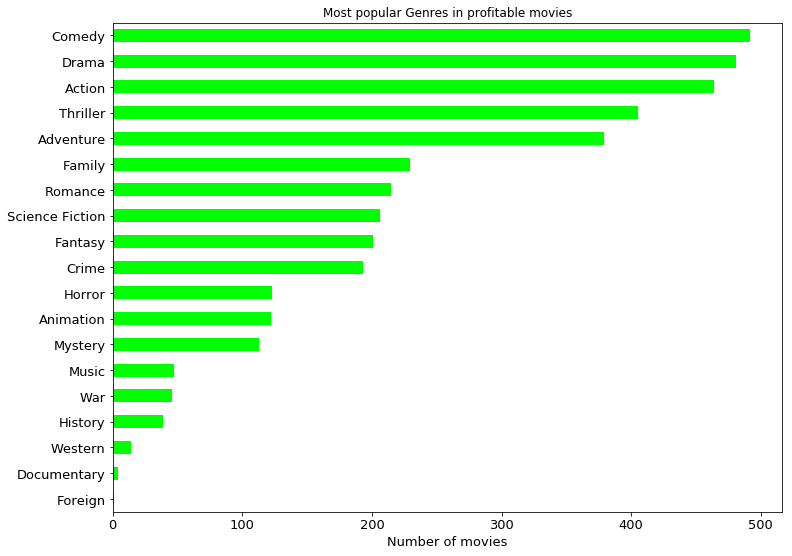

In [33]:
# Plotting the above Genres data
count.sort_values(ascending = True, inplace = True)
# Plot
plt = count.plot.barh(color = '#00FF00', fontsize = 13)

# Title
plt.set(title = 'Most popular Genres in profitable movies')

# X-axis
plt.set_xlabel('Number of movies', color ='black', fontsize = 13)

# Figuresize 
plt.figure.set_size_inches(12, 9)


# Research Question 8: Most repeated actor/cast 

In [34]:
# Reusing the data(column) function 
count = data('cast')

# printing the top/frequent cast
count.head()

Tom Cruise            27
Brad Pitt             25
Tom Hanks             22
Sylvester Stallone    21
Cameron Diaz          20
dtype: int64

In [ ]:
Based on the above calculations it is evident that Tom Cruise, Brad Pitt, Tom Hanks are top three 
most repeated actors in profitable movies.

# Research Question 9: Average budget with respect to the profitable movies

In [37]:
# Creating a funtion to find average
def profit_avg(column):
    return profit_data[column].mean()

In [38]:
# calling the profit_avg for budget
profit_avg('budget')

60444957.760837071

In [ ]:
So the most profitable movies(profit >$50M) spent an average of 60 million dollars budget. 

# Research Question 10: Average duration analysis with respect to the profitable movies

In [39]:
# Calling profit_avg function to calculate average runtime of the movies
profit_avg('runtime')

113.66741405082212

In [ ]:
Based on the above calculations movies with morethan 50 million dollars profit have an average
runtime of 113 minutes.

# Research Question 10: Average Revenue analysis with respect to the profitable movies

In [40]:
# Calling profit_avg function to calculate average revenue
profit_avg('revenue')

254957662.59491777

In [ ]:
Most profitable movies  have an average revenue of 255 million dollars.

<a id='conclusions'></a>
## Conclusions

 As part of answering research questions we did the above calculations and analysis. So for a movie to be most successful the following conclusions need to be considered as the criteria:
 
 1. Genres must be Comedy, Drama, Action, Triller and Adventure.
 2. Movies average budget should be 60 million dollars.
 3. Average duration of the movie should be around 113 minutes.
 4. Cast of the movie must include: Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, Cameron         Diaz.

By Following all of the above criteria movie can earn an average revenue of about 255 million dollars.

In [41]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_TMDb_Movie_Data.ipynb'])

0